In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


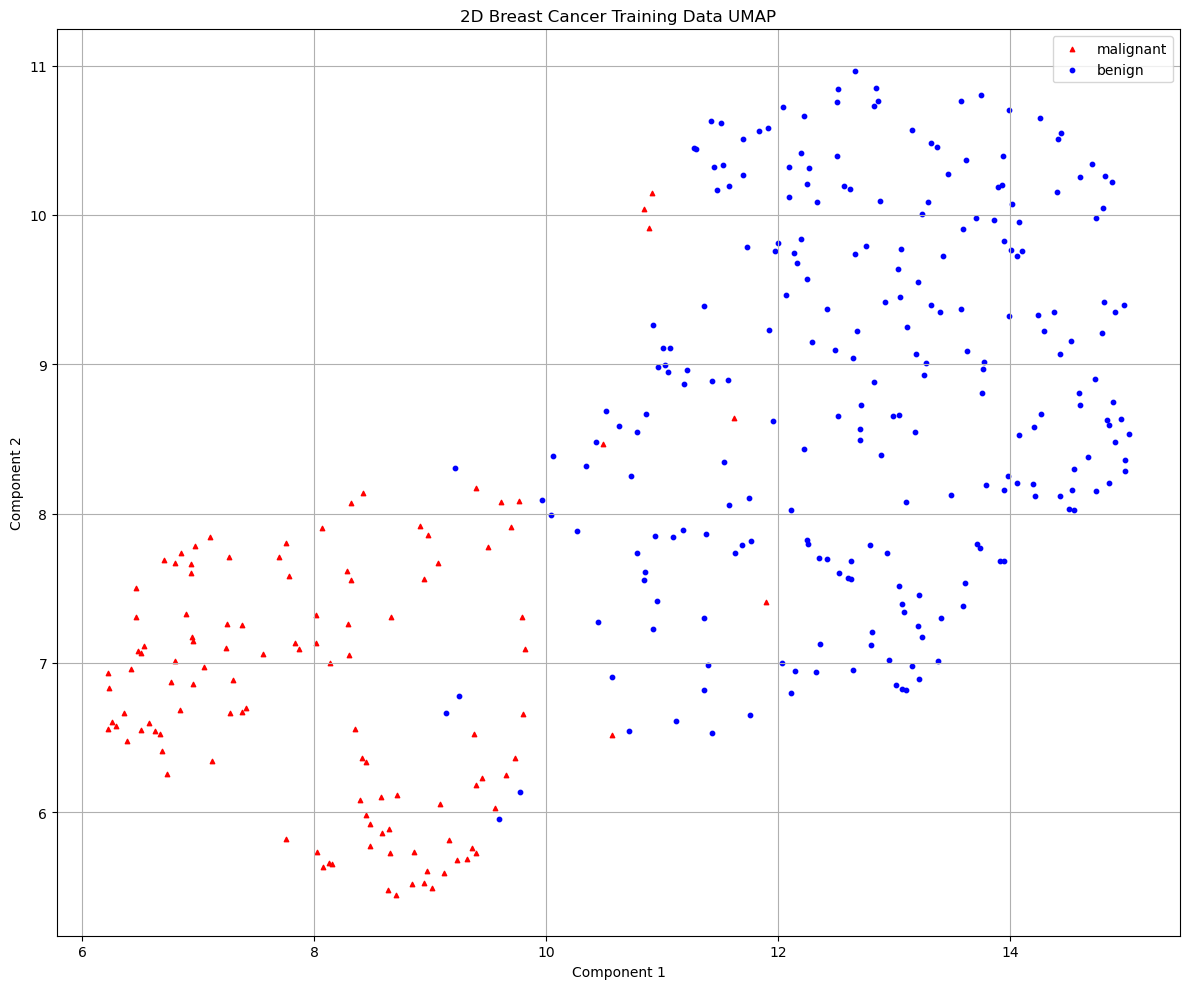

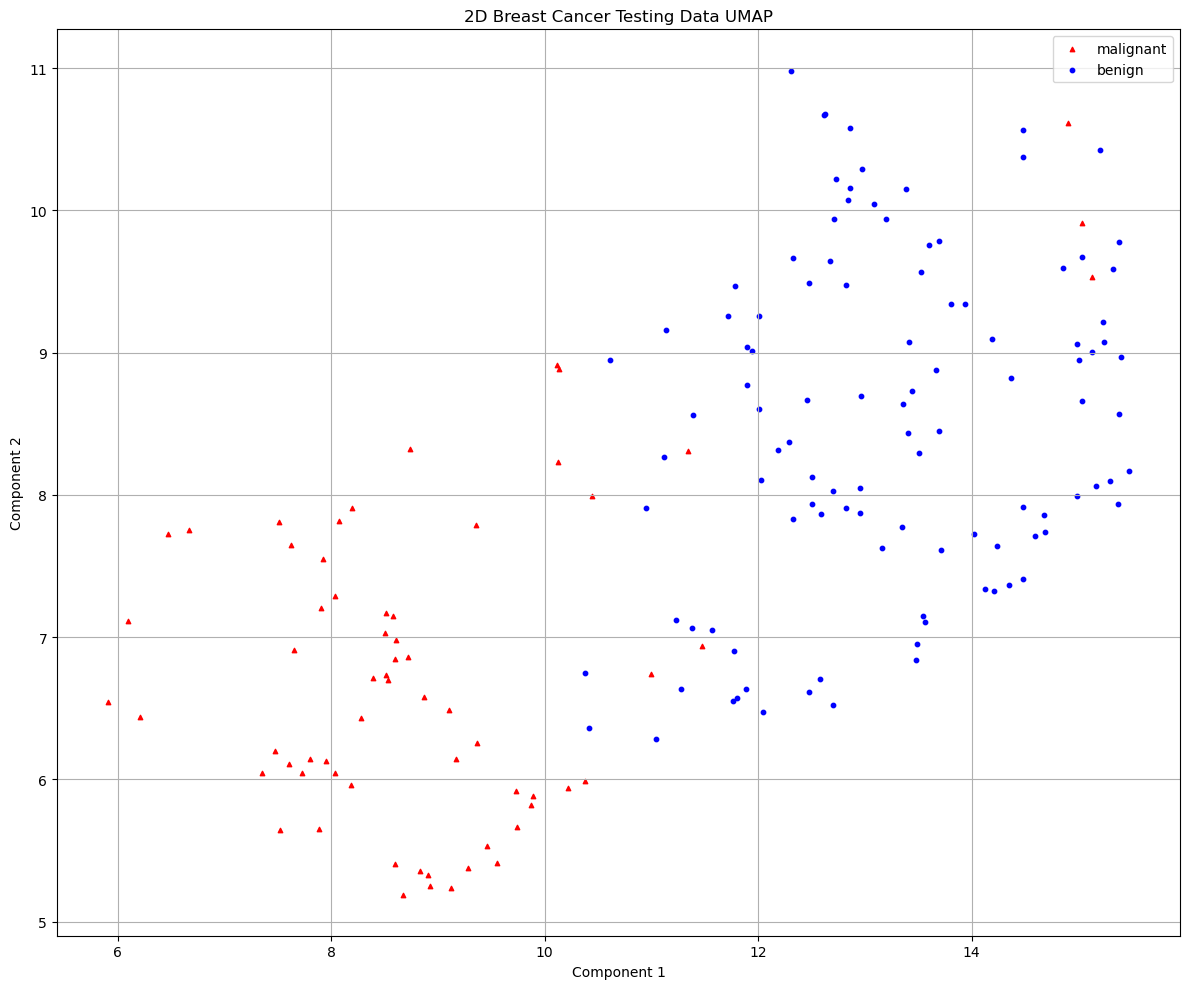

[I 2025-04-27 04:01:09,361] A new study created in memory with name: no-name-c6895144-cd88-41b1-9c1f-038321c20052
[I 2025-04-27 04:01:22,352] Trial 0 finished with value: 0.948933601609658 and parameters: {'n_estimators': 9948, 'learning_rate': 0.03309236365079291, 'num_leaves': 96, 'max_depth': 6, 'min_child_samples': 78, 'subsample': 0.8227976097759948, 'colsample_bytree': 0.8698200814776942, 'reg_alpha': 0.06494875211984182, 'reg_lambda': 2.053236823406654e-06}. Best is trial 0 with value: 0.948933601609658.
[I 2025-04-27 04:01:33,039] Trial 1 finished with value: 0.9602816901408451 and parameters: {'n_estimators': 8137, 'learning_rate': 0.0014869134597255392, 'num_leaves': 88, 'max_depth': 12, 'min_child_samples': 96, 'subsample': 0.7140640126529332, 'colsample_bytree': 0.982274141223682, 'reg_alpha': 0.0015517330324166813, 'reg_lambda': 0.0009118361450293461}. Best is trial 1 with value: 0.9602816901408451.
[I 2025-04-27 04:01:33,730] Trial 2 finished with value: 0.963098591549295

Best trial:
Accuracy: 0.966036217303823
Best hyperparameters:  {'n_estimators': 8328, 'learning_rate': 0.007345406109582119, 'num_leaves': 71, 'max_depth': 10, 'min_child_samples': 49, 'subsample': 0.6813497934411271, 'colsample_bytree': 0.9386910470673078, 'reg_alpha': 9.550740672522407, 'reg_lambda': 9.994299445218148}


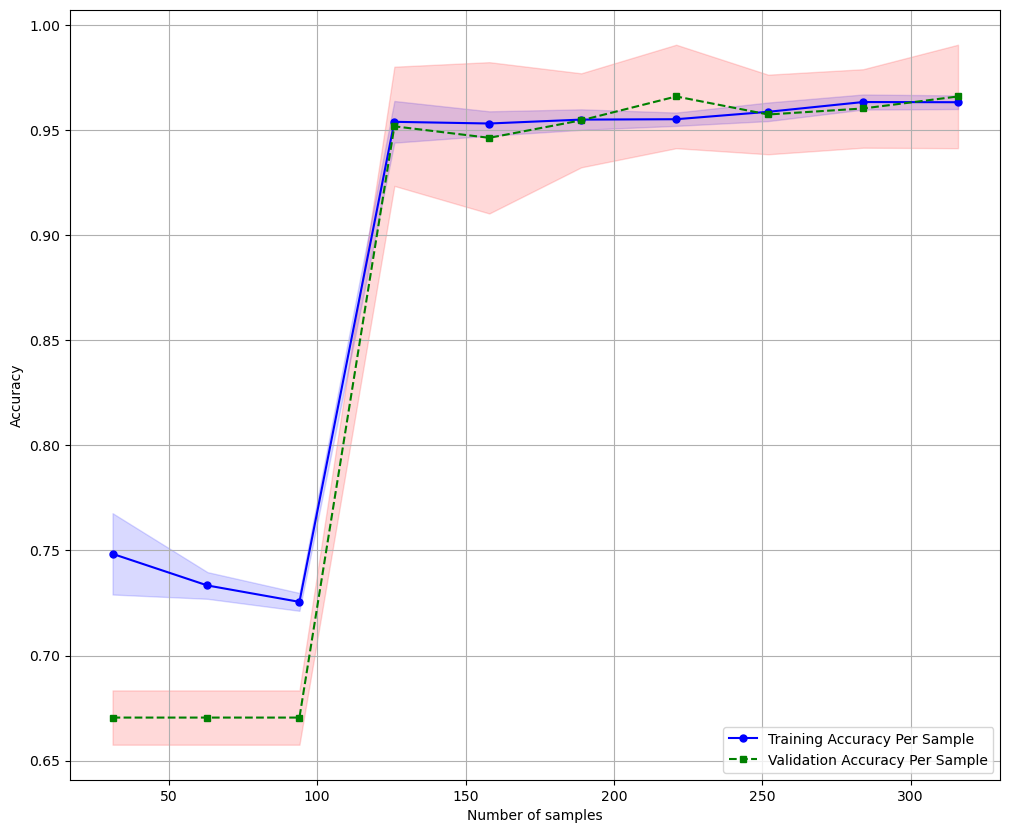

Confusion Matrix
[[ 52  12]
 [  0 107]]
Accuracy: 0.9298, Precision: 0.8992, Recall: 1.0000, F1: 0.9469, AUC:0.9505


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)